In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt


# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

/tmp/ipykernel_18307/1242050738.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
columns_to_load = [
     'location_key'
    , 'date'
    , 'place_id'
    , 'wikidata_id'
    , 'datacommons_id'
    , 'country_code'
    , 'country_name'
    , 'subregion1_code'
    , 'subregion1_name'
    , 'subregion2_code'
    , 'subregion2_name'
    , 'new_confirmed'
    , 'new_deceased'
    , 'cumulative_confirmed'
    , 'cumulative_deceased'
    , 'new_persons_fully_vaccinated'
    , 'cumulative_persons_fully_vaccinated'
    , 'population'
    , 'population_male'
    , 'population_female'
    , 'population_age_00_09'
    , 'population_age_10_19'
    , 'population_age_20_29'
    , 'population_age_30_39'
    , 'population_age_40_49'
    , 'population_age_50_59'
    , 'population_age_60_69'
    , 'population_age_70_79'
    , 'population_age_80_and_older'
    , 'openstreetmap_id'
    , 'latitude'
    , 'longitude'
    , 'area_sq_km'
    , 'life_expectancy'
    , 'mobility_retail_and_recreation'
    , 'mobility_grocery_and_pharmacy'
    , 'mobility_parks'
    , 'mobility_transit_stations'
    , 'mobility_workplaces'
    , 'mobility_residential'
    , 'average_temperature_celsius'
    , 'minimum_temperature_celsius'
    , 'maximum_temperature_celsius'
    , 'rainfall_mm'
    , 'dew_point'
    , 'relative_humidity'
]

In [3]:
# Directory path to your CSV files
# directory_path = "../Test CSVs/"  # Example directory path
directory_path = "../All CSVs/"  # Example directory path

# Initialize an empty DataFrame to store data from all CSV files
full_df = pd.DataFrame(columns=columns_to_load)

# Loop over the list of CSV files
for file in glob.glob(directory_path + '*.csv'):
    # Read the CSV file without specifying columns to ensure we don't miss any data
    df = pd.read_csv(file)
    
    # Ensure all desired columns are present, add them with NaN values if they are missing
    for column in columns_to_load:
        if column not in df.columns:
            df[column] = np.nan

    # Reorder and select only the desired columns to maintain consistency
    df = df[columns_to_load]
    
    # Append the contents of the file to the full DataFrame
    full_df = pd.concat([full_df, df], ignore_index=True)

# Optionally, reset the index of the final DataFrame
full_df.reset_index(drop=True, inplace=True)



/tmp/ipykernel_18307/2960894299.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat([full_df, df], ignore_index=True)
/tmp/ipykernel_18307/2960894299.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat([full_df, df], ignore_index=True)


In [4]:
# Print each column name
for column in df.columns:
    print(column)

location_key
date
place_id
wikidata_id
datacommons_id
country_code
country_name
subregion1_code
subregion1_name
subregion2_code
subregion2_name
new_confirmed
new_deceased
cumulative_confirmed
cumulative_deceased
new_persons_fully_vaccinated
cumulative_persons_fully_vaccinated
population
population_male
population_female
population_age_00_09
population_age_10_19
population_age_20_29
population_age_30_39
population_age_40_49
population_age_50_59
population_age_60_69
population_age_70_79
population_age_80_and_older
openstreetmap_id
latitude
longitude
area_sq_km
life_expectancy
mobility_retail_and_recreation
mobility_grocery_and_pharmacy
mobility_parks
mobility_transit_stations
mobility_workplaces
mobility_residential
average_temperature_celsius
minimum_temperature_celsius
maximum_temperature_celsius
rainfall_mm
dew_point
relative_humidity


In [5]:
full_df.shape

(3198948, 46)

In [6]:
full_df.sample(n=20)

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,openstreetmap_id,latitude,longitude,area_sq_km,life_expectancy,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,dew_point,relative_humidity
672993,US_NY_36091,2020-04-14,ChIJ_wmheghF3okRp4CsEEsdMi8,Q487605,geoId/36091,US,United States of America,NY,New York,36091,Saratoga County,23.0,0.0,224.0,1.0,NaN,NaN,229276,113550,115726,24630,27514,27124,28402,30631,35431,28953,17401,9190,1428790,43.110000,-73.870000,2185,81.691667,-51.0,-14.0,69.0,-27.0,-55.0,23.0,7.755556,3.844444,16.283333,16.030222,-3.994444,43.303266
238288,US_KY_21149,2021-03-24,ChIJQ1aTHoTsb4gRRQEQm8qYpV0,Q503495,geoId/21149,US,United States of America,KY,Kentucky,21149,McLean County,2.0,0.0,851.0,27.0,NaN,NaN,9216,4560,4656,1107,1244,965,970,1164,1352,1184,835,395,1846560,37.530000,-87.260000,663,79.466667,NaN,NaN,NaN,NaN,-17.0,NaN,17.462963,13.006173,23.308642,0.000000,10.888889,65.287930
1247167,US_RI_44003,2021-05-04,ChIJ43LtkkK15YkRYi2PFlg8jwA,Q54254,geoId/44003,US,United States of America,RI,Rhode Island,44003,Kent County,0.0,0.0,18092.0,360.0,1214.0,67149.0,163543,79060,84483,16362,17674,19619,20742,20698,26266,21954,12261,7967,392935,41.704124,-71.479530,487,78.870270,-4.0,-6.0,61.0,-38.0,-28.0,9.0,10.700000,9.455556,14.472222,5.108222,9.411111,92.125873
539856,US_NE_31045,2022-01-22,ChIJI42WwpmEeYcRmD_Sfc11ECg,Q485221,geoId/31045,US,United States of America,NE,Nebraska,31045,Dawes County,0.0,0.0,1269.0,21.0,1.0,3211.0,8888,4434,4454,881,1350,1934,842,749,1004,987,639,502,1425406,42.710000,-103.140000,3628,82.200000,NaN,NaN,NaN,NaN,NaN,NaN,-1.572222,-8.288889,6.555556,0.939800,-6.444444,67.808284
1000745,US_FL_12035,2022-04-06,ChIJ_1RVZTjt5ogRva_K8GwyO2U,Q386885,geoId/12035,US,United States of America,FL,Florida,12035,Flagler County,0.0,1.0,22257.0,355.0,12.0,72811.0,109999,52891,57108,9475,11455,9811,10087,11878,15054,19497,15372,7370,1210749,29.470000,-81.300000,1478,79.005263,-6.0,5.0,1.0,NaN,-13.0,3.0,24.572222,20.011111,29.961111,0.666750,21.350000,82.502743
3146087,US_WI_55025,2021-10-15,ChIJR0uBFlj2BogRz09LOU-1Vyw,Q502200,geoId/55025,US,United States of America,WI,Wisconsin,55025,Dane County,0.0,0.0,56611.0,364.0,215.0,400866.0,537453,267140,270313,61690,65905,100262,79071,63897,65296,56173,28568,16591,1799444,43.070000,-89.420000,3207,NaN,-4.0,10.0,72.0,-17.0,-24.0,7.0,10.444444,5.988889,15.911111,0.000000,5.822222,73.438295
401807,US_KS_20167,2021-03-28,ChIJy-U6m2qzo4cRux1S6uff0VA,Q375143,geoId/20167,US,United States of America,KS,Kansas,20167,Russell County,0.0,0.0,853.0,23.0,NaN,NaN,6930,3430,3500,877,755,666,727,699,958,1021,692,535,1070410,38.916700,-98.766700,2328,79.700000,NaN,NaN,NaN,NaN,NaN,NaN,8.617284,-1.388889,20.783951,0.000000,-1.123457,50.563820
2931216,US_KY_21209,2022-04-09,ChIJOZ9N364jQogRaGUAZ0l4wgw,Q498028,geoId/21209,US,United States of America,KY,Kentucky,21209,Scott County,0.0,0.0,16907.0,103.0,14.0,31719.0,54782,26908,27874,7543,7829,7405,7564,7888,7178,5397,2700,1278,1846584,38.300000,-84.580000,739,77.772727,2.0,-15.0,NaN,19.0,-24.0,2.0,3.394444,0.872222,7.244444,2.370667,0.037037,78.764931
2739323,US_TN_47115,2020-07-18,ChIJ3XB7acP_YIgREXiDM2phhN8,Q501968,geoId/47115,US,United States of America,TN,Tennessee,47115,Marion County,4.0,0.0,121.0,4.0,NaN,NaN,28406,13917,14489,3232,3401,3296,3109,3631,4099,3969,2491,1178,1848188,35.1

### Do locations that administered vaccines more quickly see fewer total rates of infections?

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Data Prep
cluster_df = full_df.copy()
cluster_df['date'] = pd.to_datetime(cluster_df['date'])
cluster_df['quarter'] = cluster_df['date'].dt.to_period('Q')
cluster_df['county_name'] = cluster_df['subregion2_name'] + ', ' + cluster_df['subregion1_name']

# Focus on a specific quarter and drop rows with nulls in critical columns
df_q2_2021 = cluster_df[cluster_df['quarter'] == '2021Q2']
df_q2_2021 = df_q2_2021.dropna(subset=['cumulative_persons_fully_vaccinated', 'population', 'cumulative_confirmed'])
# Display the number of NaNs in each column
nan_counts = cluster_df.isnull().sum()
print(nan_counts[nan_counts > 0])  # Display only columns with NaNs

place_id                                  1982
datacommons_id                            1982
subregion2_code                           2973
subregion2_name                           2973
new_confirmed                           706300
new_deceased                            775634
cumulative_confirmed                    703123
cumulative_deceased                     772496
new_persons_fully_vaccinated           1613978
cumulative_persons_fully_vaccinated    1610758
population_male                          79280
population_female                        79280
population_age_00_09                     79280
population_age_10_19                     79280
population_age_20_29                     79280
population_age_30_39                     79280
population_age_40_49                     79280
population_age_50_59                     79280
population_age_60_69                     79280
population_age_70_79                     79280
population_age_80_and_older              79280
openstreetmap

In [9]:
# Analyze NaN distribution by region
nan_by_region = df_q2_2021[df_q2_2021.isnull().any(axis=1)].groupby('county_name', ).size()
print(nan_by_region)

# Analyze NaN distribution by date
nan_by_date = df_q2_2021[df_q2_2021.isnull().any(axis=1)].groupby('date').size()
print(nan_by_date)


county_name
Abbeville County, South Carolina    66
Acadia Parish, Louisiana            66
Accomack County, Virginia           66
Ada County, Idaho                   10
Adair County, Iowa                  66
                                    ..
Yuma County, Arizona                 1
Yuma County, Colorado               66
Zapata County, Texas                66
Zavala County, Texas                66
Ziebach County, South Dakota        66
Length: 3215, dtype: int64
date
2021-04-26    3217
2021-04-27    2811
2021-04-28    2781
2021-04-29    2775
2021-04-30    2763
              ... 
2021-06-26    2811
2021-06-27    2814
2021-06-28    2799
2021-06-29    2808
2021-06-30    2798
Length: 66, dtype: int64


In [10]:
# Check for NaN values specifically in relevant columns
important_columns = ['cumulative_persons_fully_vaccinated', 'population', 'cumulative_confirmed']
print(df_q2_2021[important_columns].isnull().sum())

cumulative_persons_fully_vaccinated    0
population                             0
cumulative_confirmed                   0
dtype: int64


In [11]:
# Display rows with NaNs in important columns
df_q2_2021[df_q2_2021[important_columns].isnull().any(axis=1)]

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,openstreetmap_id,latitude,longitude,area_sq_km,life_expectancy,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,dew_point,relative_humidity,quarter,county_name


In [12]:

# Check for completely missing data in important columns by county
complete_missing_data_counties = df_q2_2021.groupby('county_name')[important_columns].apply(
    lambda x: x.isnull().all(axis=1).all()
).reset_index(name='All_Data_Missing')
print("Counties with completely missing data:")
complete_missing_data_counties[complete_missing_data_counties['All_Data_Missing']]

# Calculate the percentage of available data by county for important columns
data_availability = df_q2_2021.groupby('county_name')[important_columns].apply(
    lambda x: 100 * (1 - x.isnull().mean())
).rename(columns=lambda x: f"{x}_availability_%").reset_index()
print("\nPercentage of available data by county:")
data_availability

Counties with completely missing data:

Percentage of available data by county:


,county_name,cumulative_persons_fully_vaccinated_availability_%,population_availability_%,cumulative_confirmed_availability_%
0,"Abbeville County, South Carolina",100.0,100.0,100.0
1,"Acadia Parish, Louisiana",100.0,100.0,100.0
2,"Accomack County, Virginia",100.0,100.0,100.0
3,"Ada County, Idaho",100.0,100.0,100.0
4,"Adair County, Iowa",100.0,100.0,100.0
...,...,...,...,...
3210,"Yuma County, Arizona",100.0,100.0,100.0
3211,"Yuma County, Colorado",100.0,100.0,100.0
3212,"Zapata County, Texas",100.0,100.0,100.0
3213,"Zavala County, Texas",100.0,100.0,100.0


      quarter                       county_name  All_Data_Missing
0      2020Q1  Abbeville County, South Carolina              True
1      2020Q1          Acadia Parish, Louisiana              True
2      2020Q1         Accomack County, Virginia              True
3      2020Q1                 Ada County, Idaho              True
4      2020Q1                Adair County, Iowa              True
...       ...                               ...               ...
35470  2022Q3              Yuma County, Arizona             False
35471  2022Q3             Yuma County, Colorado             False
35472  2022Q3              Zapata County, Texas             False
35473  2022Q3              Zavala County, Texas             False
35474  2022Q3      Ziebach County, South Dakota             False

[35475 rows x 3 columns]
   quarter  Count_of_Counties_Missing_Data
0   2020Q1                            3225
1   2020Q2                            3225
2   2020Q3                            3225
3   2020Q4

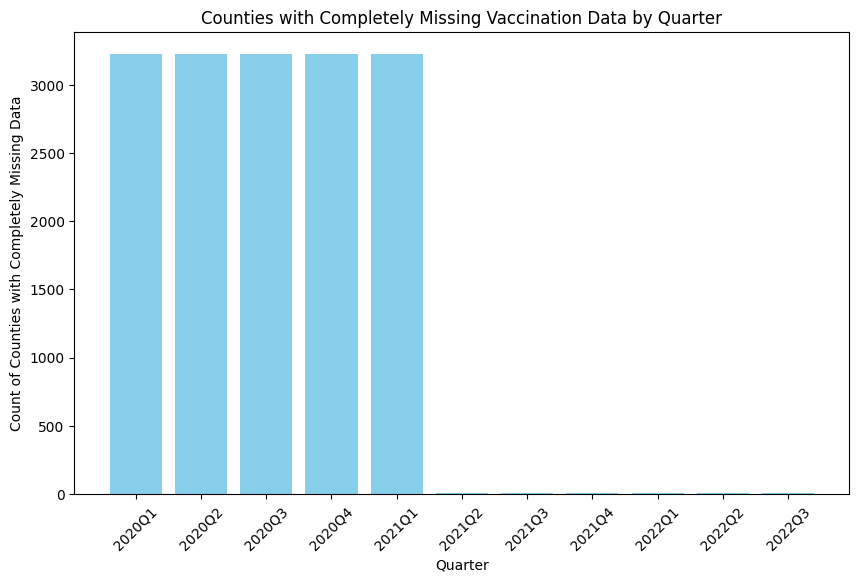

In [13]:
# Group data by 'quarter' and 'county_name' and check if all data is missing for 'cumulative_persons_fully_vaccinated'
all_missing_by_quarter = cluster_df.groupby(['quarter', 'county_name'])['cumulative_persons_fully_vaccinated'].apply(
    lambda x: x.isnull().all()
).reset_index(name='All_Data_Missing')

# Display results
print(all_missing_by_quarter)

missing_counts_by_quarter = all_missing_by_quarter[all_missing_by_quarter['All_Data_Missing']].groupby('quarter').size().reset_index(name='Count_of_Counties_Missing_Data')
print(missing_counts_by_quarter)


# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(missing_counts_by_quarter['quarter'].astype(str), missing_counts_by_quarter['Count_of_Counties_Missing_Data'], color='skyblue')
plt.xlabel('Quarter')
plt.ylabel('Count of Counties with Completely Missing Data')
plt.title('Counties with Completely Missing Vaccination Data by Quarter')
plt.xticks(rotation=45)
plt.show()

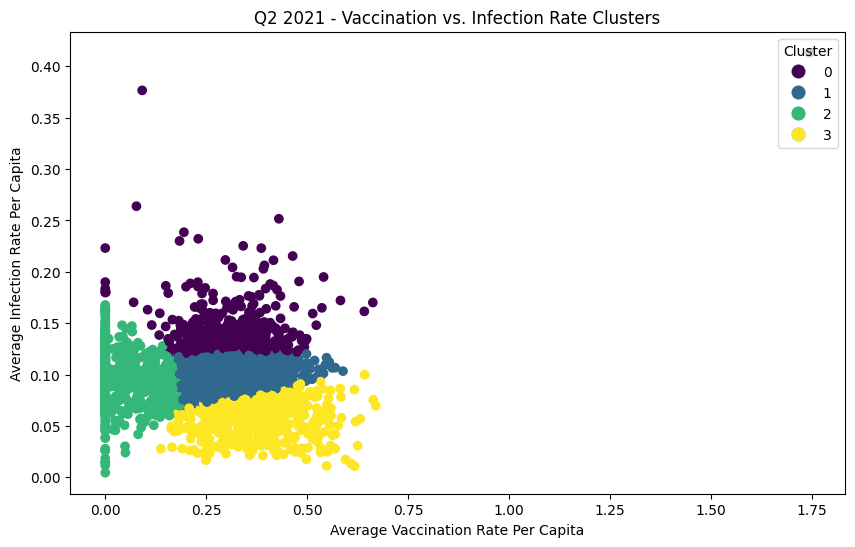

In [14]:


# Data Prep
cluster_df = full_df.copy()
cluster_df['date'] = pd.to_datetime(cluster_df['date'])
cluster_df['quarter'] = cluster_df['date'].dt.to_period('Q')
cluster_df['county_name'] = cluster_df['subregion2_name'] + ', ' + cluster_df['subregion1_name']

# Focus on a specific quarter and drop rows with nulls in critical columns
df_q2_2021 = cluster_df[cluster_df['quarter'] == '2021Q2']
df_q2_2021 = df_q2_2021.dropna(subset=['cumulative_persons_fully_vaccinated', 'population', 'cumulative_confirmed'])

# Calculate per capita rates and then average them by location
df_q2_2021['vaccination_rate_per_capita'] = df_q2_2021['cumulative_persons_fully_vaccinated'] / df_q2_2021['population']
df_q2_2021['infection_rate_per_capita'] = df_q2_2021['cumulative_confirmed'] / df_q2_2021['population']

# Aggregating data by location key
df_aggregated = df_q2_2021.groupby('location_key').agg({
    'vaccination_rate_per_capita': 'mean',
    'infection_rate_per_capita': 'mean'
}).reset_index()

# Standardizing the aggregated data
scaler = StandardScaler()
X = scaler.fit_transform(df_aggregated[['vaccination_rate_per_capita', 'infection_rate_per_capita']])

# Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df_aggregated['Cluster'] = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_aggregated['vaccination_rate_per_capita'], df_aggregated['infection_rate_per_capita'],
                      c=df_aggregated['Cluster'], cmap='viridis')

# Create a legend:
# Get unique labels and colors from the scatter plot
labels = np.unique(df_aggregated['Cluster'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      markeredgewidth=0.1, markersize=10, 
                      markerfacecolor=scatter.cmap(scatter.norm(yi))) for yi in labels]

# Add legend to the plot
plt.legend(handles, labels, title="Cluster", loc='upper right')

plt.xlabel('Average Vaccination Rate Per Capita')
plt.ylabel('Average Infection Rate Per Capita')
plt.title('Q2 2021 - Vaccination vs. Infection Rate Clusters')
plt.show()

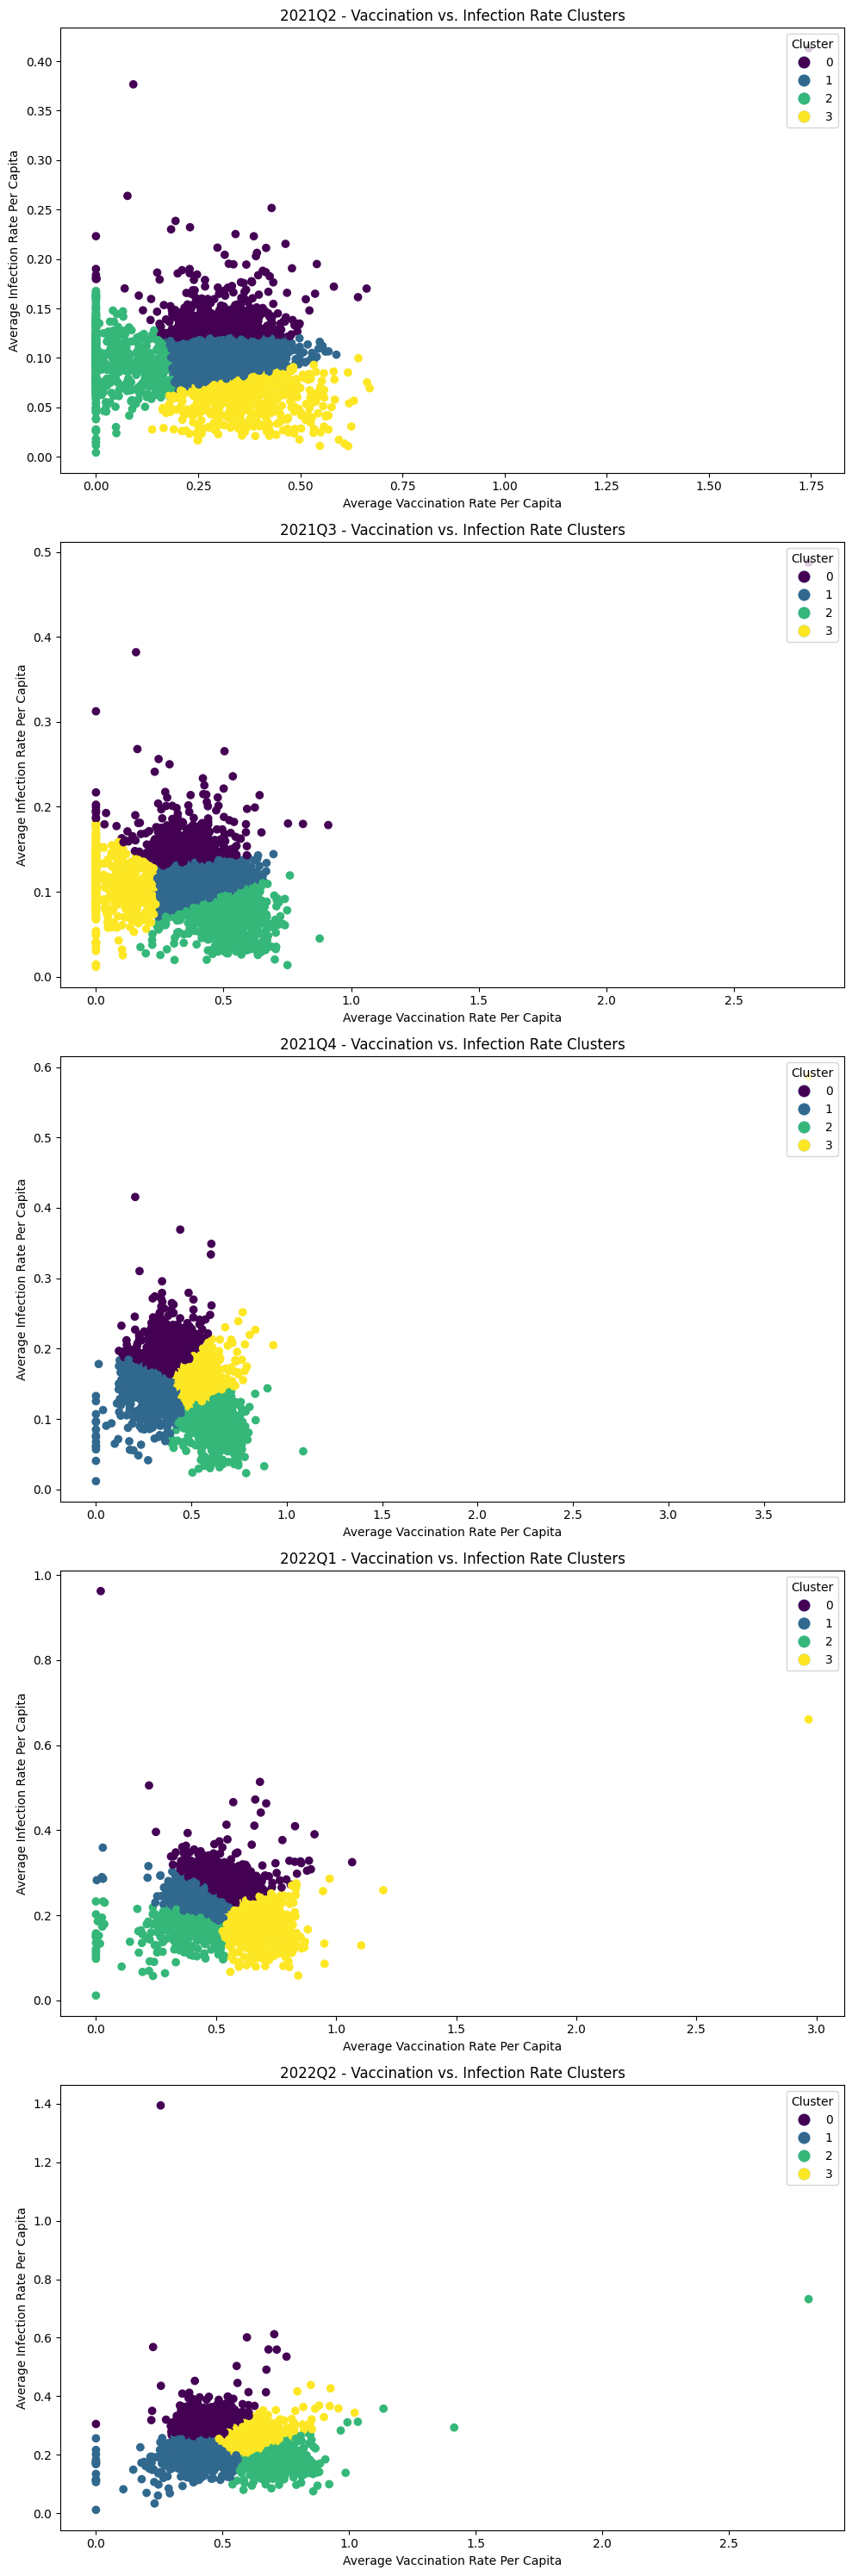

In [15]:
# Filter the dataframe for the quarters from 2021Q2 through 2022Q2
quarters_of_interest = pd.period_range(start='2021Q2', end='2022Q2', freq='Q')
cluster_df = cluster_df[cluster_df['quarter'].isin(quarters_of_interest)]

# Determine all quarters present in the filtered data
all_quarters = cluster_df['quarter'].unique()

# Create subplots for each quarter
fig, axes = plt.subplots(nrows=len(all_quarters), ncols=1, figsize=(10, 6 * len(all_quarters)))

# Check if axes is iterable (in case there's only one quarter)
if not hasattr(axes, '__iter__'):
    axes = [axes]

for ax, quarter in zip(axes, all_quarters):
    # Filter data for the specific quarter
    df_quarter = cluster_df[cluster_df['quarter'] == quarter].dropna(subset=['cumulative_persons_fully_vaccinated', 'population', 'cumulative_confirmed'])
    
    # Check if the dataframe is empty after dropping NaN values
    if df_quarter.empty:
        ax.text(0.5, 0.5, f"No data available for {quarter}", horizontalalignment='center', verticalalignment='center')
        ax.set_xlabel('Average Vaccination Rate Per Capita')
        ax.set_ylabel('Average Infection Rate Per Capita')
        ax.set_title(f'{quarter} - No Data')
        continue
    
    # Calculate per capita rates
    df_quarter['vaccination_rate_per_capita'] = df_quarter['cumulative_persons_fully_vaccinated'] / df_quarter['population']
    df_quarter['infection_rate_per_capita'] = df_quarter['cumulative_confirmed'] / df_quarter['population']
    
    # Aggregate data by location key
    df_aggregated = df_quarter.groupby('location_key').agg({
        'vaccination_rate_per_capita': 'mean',
        'infection_rate_per_capita': 'mean'
    }).reset_index()
    
    # Proceed with scaling and clustering only if there are enough samples
    if len(df_aggregated) > 0:
        # Standardizing the aggregated data
        scaler = StandardScaler()
        X = scaler.fit_transform(df_aggregated[['vaccination_rate_per_capita', 'infection_rate_per_capita']])
        
        # Clustering
        kmeans = KMeans(n_clusters=4, random_state=0)
        df_aggregated['Cluster'] = kmeans.fit_predict(X)
        
        # Plot for the quarter
        scatter = ax.scatter(df_aggregated['vaccination_rate_per_capita'], df_aggregated['infection_rate_per_capita'], c=df_aggregated['Cluster'], cmap='viridis')
        
        # Create a legend for the clusters
        labels = np.unique(df_aggregated['Cluster'])
        handles = [plt.Line2D([], [], marker="o", ls="", markeredgewidth=0.1, markersize=10, markerfacecolor=scatter.cmap(scatter.norm(yi))) for yi in labels]
        ax.legend(handles, labels, title="Cluster", loc='upper right')
    else:
        ax.text(0.5, 0.5, f"Not enough data for clustering in {quarter}", horizontalalignment='center', verticalalignment='center')
    
    ax.set_xlabel('Average Vaccination Rate Per Capita')
    ax.set_ylabel('Average Infection Rate Per Capita')
    ax.set_title(f'{quarter} - Vaccination vs. Infection Rate Clusters')

plt.tight_layout()
plt.show()

/tmp/ipykernel_18307/3979085849.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['month'] = cluster_df['date'].dt.to_period('M')
/tmp/ipykernel_18307/3979085849.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['month'] = cluster_df['date'].dt.to_period('M')


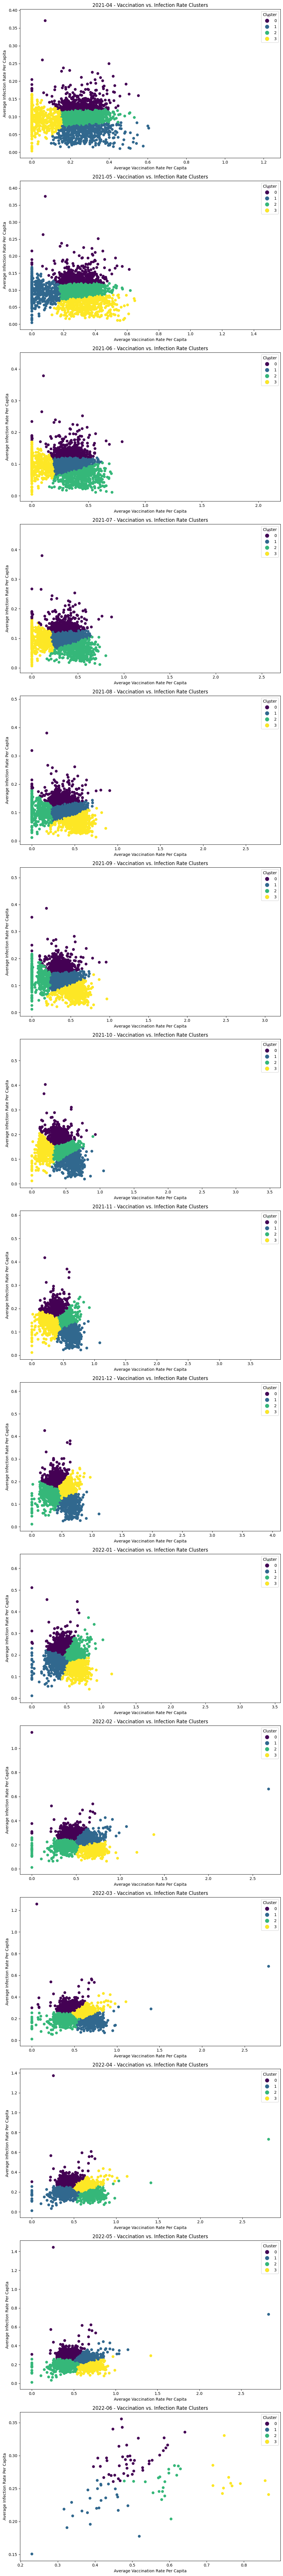

In [16]:
# Assuming 'full_df' is already defined and contains the full dataset with a 'date' column
# Convert 'date' to datetime, if it hasn't been converted already
full_df['date'] = pd.to_datetime(full_df['date'])

# Filter the dataframe for the dates from April 2021 through June 2022
start_date = '2021-04-01'
end_date = '2022-06-30'
cluster_df = full_df[(full_df['date'] >= start_date) & (full_df['date'] <= end_date)]

# Determine all months present in the data
cluster_df['month'] = cluster_df['date'].dt.to_period('M')
all_months = cluster_df['month'].sort_values().unique()

# Create subplots for each month
fig, axes = plt.subplots(nrows=len(all_months), ncols=1, figsize=(10, 6 * len(all_months)))

# Check if axes is iterable (in case there's only one month)
if not hasattr(axes, '__iter__'):
    axes = [axes]

# Ensure 'month' column is set for proper grouping
cluster_df['month'] = cluster_df['date'].dt.to_period('M')

for ax, month in zip(axes, all_months):
    # Filter data for the specific month
    df_month = cluster_df[cluster_df['month'] == month].dropna(subset=['cumulative_persons_fully_vaccinated', 'population', 'cumulative_confirmed'])
    
    # Check if the dataframe is empty after dropping NaN values
    if df_month.empty:
        ax.text(0.5, 0.5, f"No data available for {month}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xlabel('Average Vaccination Rate Per Capita')
        ax.set_ylabel('Average Infection Rate Per Capita')
        ax.set_title(f'{month} - No Data')
        continue
    
    # Calculate per capita rates
    df_month['vaccination_rate_per_capita'] = df_month['cumulative_persons_fully_vaccinated'] / df_month['population']
    df_month['infection_rate_per_capita'] = df_month['cumulative_confirmed'] / df_month['population']
    
    # Aggregate data by location key
    df_aggregated = df_month.groupby('location_key').agg({
        'vaccination_rate_per_capita': 'mean',
        'infection_rate_per_capita': 'mean'
    }).reset_index()
    
    # Proceed with scaling and clustering only if there are enough samples
    if len(df_aggregated) > 0:
        # Standardizing the aggregated data
        scaler = StandardScaler()
        X = scaler.fit_transform(df_aggregated[['vaccination_rate_per_capita', 'infection_rate_per_capita']])
        
        # Clustering
        kmeans = KMeans(n_clusters=4, random_state=0)
        df_aggregated['Cluster'] = kmeans.fit_predict(X)
        
        # Plot for the month
        scatter = ax.scatter(df_aggregated['vaccination_rate_per_capita'], df_aggregated['infection_rate_per_capita'], c=df_aggregated['Cluster'], cmap='viridis')
        
        # Create a legend for the clusters
        labels = np.unique(df_aggregated['Cluster'])
        handles = [plt.Line2D([], [], marker="o", ls="", markeredgewidth=0.1, markersize=10, markerfacecolor=scatter.cmap(scatter.norm(yi))) for yi in labels]
        ax.legend(handles, labels, title="Cluster", loc='upper right')
    else:
        ax.text(0.5, 0.5, f"Not enough data for clustering in {month}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
    ax.set_xlabel('Average Vaccination Rate Per Capita')
    ax.set_ylabel('Average Infection Rate Per Capita')
    ax.set_title(f'{month} - Vaccination vs. Infection Rate Clusters')

plt.tight_layout()
plt.show()